In [1]:
%reset -sf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import seaborn as sns

from bs4 import BeautifulSoup

## Process files

In [2]:
with open('./residents-subzone-2017.kml', 'r') as f:
    soup = BeautifulSoup(f, 'xml')

In [3]:
placemarks = [placemark for placemark in soup.find_all('Placemark')]

In [4]:
placemarks[0].ExtendedData.SchemaData

<SchemaData schemaUrl="#kml_schema_ft_SUBZONE_DWELLING_TYPE_2017">
<SimpleData name="SUBZONE_N">MARINA SOUTH</SimpleData>
<SimpleData name="PLN_AREA_N">MARINA SOUTH</SimpleData>
<SimpleData name="TOTAL">0</SimpleData>
<SimpleData name="HDB">0</SimpleData>
<SimpleData name="ONE_TO_TWO_RM">0</SimpleData>
<SimpleData name="THREE_RM">0</SimpleData>
<SimpleData name="FOUR_RM">0</SimpleData>
<SimpleData name="FIVE_RM_EXEC_FLATS">0</SimpleData>
<SimpleData name="CONDOS_OTHER_APTS">0</SimpleData>
<SimpleData name="LANDED_PROPERTIES">0</SimpleData>
<SimpleData name="OTHERS">0</SimpleData>
<SimpleData name="INC_CRC">A414A47E5AA4EDB5</SimpleData>
<SimpleData name="FMEL_UPD_D">20170927160941</SimpleData>
</SchemaData>

In [5]:
print(len(placemarks))

323


In [6]:
# reading one datapoint
sample = [
placemarks[0].get('id'),
placemarks[0].snippet,
# placemarks[0].description,
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"SUBZONE_N"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"PLN_AREA_N"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"TOTAL"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"HDB"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"ONE_TO_TWO_RM"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"THREE_RM"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"FOUR_RM"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"FIVE_RM_EXEC_FLATS"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"CONDOS_OTHER_APTS"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"LANDED_PROPERTIES"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"OTHERS"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"INC_CRC"}),
placemarks[0].ExtendedData.SchemaData.find("SimpleData", {"name":"FMEL_UPD_D"}),
# [[float(num) for num in pt.split(",")] 
#  for pt in placemarks[26].Polygon.outerBoundaryIs.LinearRing.text.strip().split(" ")],
# [[float(num) for num in pt.split(",")] 
#  for pt in placemarks[26].Polygon.text.strip().replace("\n\n\n\n\n", " ").split(" ")]
]
sample

['kml_1',
 <snippet> </snippet>,
 <SimpleData name="SUBZONE_N">MARINA SOUTH</SimpleData>,
 <SimpleData name="PLN_AREA_N">MARINA SOUTH</SimpleData>,
 <SimpleData name="TOTAL">0</SimpleData>,
 <SimpleData name="HDB">0</SimpleData>,
 <SimpleData name="ONE_TO_TWO_RM">0</SimpleData>,
 <SimpleData name="THREE_RM">0</SimpleData>,
 <SimpleData name="FOUR_RM">0</SimpleData>,
 <SimpleData name="FIVE_RM_EXEC_FLATS">0</SimpleData>,
 <SimpleData name="CONDOS_OTHER_APTS">0</SimpleData>,
 <SimpleData name="LANDED_PROPERTIES">0</SimpleData>,
 <SimpleData name="OTHERS">0</SimpleData>,
 <SimpleData name="INC_CRC">A414A47E5AA4EDB5</SimpleData>,
 <SimpleData name="FMEL_UPD_D">20170927160941</SimpleData>]

In [7]:
# pm.ExtendedData.decompose()
# pm.description.decompose()
# pm.text[14:].strip().split(" ")

In [8]:
placemark_data = []

for placemark in placemarks:
    val_TOTAL = int(placemark.ExtendedData.SchemaData.find("SimpleData", {"name":"TOTAL"}).text)
    val_SUBZONE_N = placemark.ExtendedData.SchemaData.find("SimpleData", {"name":"SUBZONE_N"}).text
    val_PLN_AREA_N = placemark.ExtendedData.SchemaData.find("SimpleData", {"name":"PLN_AREA_N"}).text
    placemark.ExtendedData.decompose()
    placemark.description.decompose()
    placemark_data.append([
        placemark.get('id'),
        val_TOTAL,
        val_SUBZONE_N,
        val_PLN_AREA_N,
#         [[float(num) for num in pt.split(",")] 
#          for pt in placemark.Polygon.text.strip().replace("\n\n\n\n\n", " ").split(" ")]
#         [[float(num) for num in pt.split(",")] 
#          for pt in placemark.Polygon.outerBoundaryIs.LinearRing.text.strip().split(" ")]
#         [[float(num) for num in pt.split(",")] 
#          for pt in placemark.text[14:].strip().replace("\n\n\n\n\n", " ").split(" ")]
        [[[float(num) for num in pt.split(",")] 
          for pt in ring.split(" ")] 
         for ring in placemark.text[14:].strip().split("\n\n\n\n\n")]
    ])

In [9]:
df = pd.DataFrame(placemark_data, 
                  columns=["id", "TOTAL", "SUBZONE_N", "PLN_AREA_N", "boundary"])

In [10]:
sum(df["TOTAL"])

3966030

## Calculate the centre of subzone
This is an estimate

In [11]:
def centre_boundary(boundary):
    boundary = sum(row["boundary"], [])  # flatten one level
    x_mean = sum([b[0] for b in boundary])/len(boundary)
    y_mean = sum([b[1] for b in boundary])/len(boundary)
    return x_mean, y_mean

In [12]:
df["x_centre"] = np.nan
df["y_centre"] = np.nan

In [13]:
for index, row in df.iterrows():
    x_mean, y_mean = centre_boundary(row["boundary"])
    df.at[index, "x_centre"] = x_mean
    df.at[index, "y_centre"] = y_mean

In [14]:
df.head(5)

,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre
0,kml_1,0,MARINA SOUTH,MARINA SOUTH,"[[[103.864727625087, 1.28884988006674, 0.0], [...",103.868148,1.281249
1,kml_2,7710,PEARL'S HILL,OUTRAM,"[[[103.843133115736, 1.28778177841935, 0.0], [...",103.839732,1.284103
2,kml_3,140,BOAT QUAY,SINGAPORE RIVER,"[[[103.850681360066, 1.28649059616468, 0.0], [...",103.848253,1.286980
3,kml_4,11870,HENDERSON HILL,BUKIT MERAH,"[[[103.825512734945, 1.28812398702608, 0.0], [...",103.820963,1.286102
4,kml_5,12190,REDHILL,BUKIT MERAH,"[[[103.819400411545, 1.29116924028884, 0.0], [...",103.817493,1.287359


## Display histogram

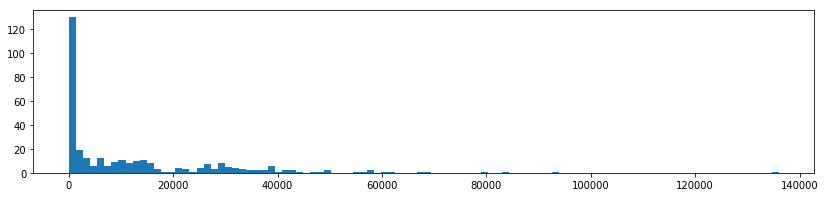

46

In [15]:
plt.figure(figsize=(14,3))
plt.hist(df["TOTAL"], bins=100)
plt.show()
len([x for x in df["TOTAL"] if x > 30000])

## Display map

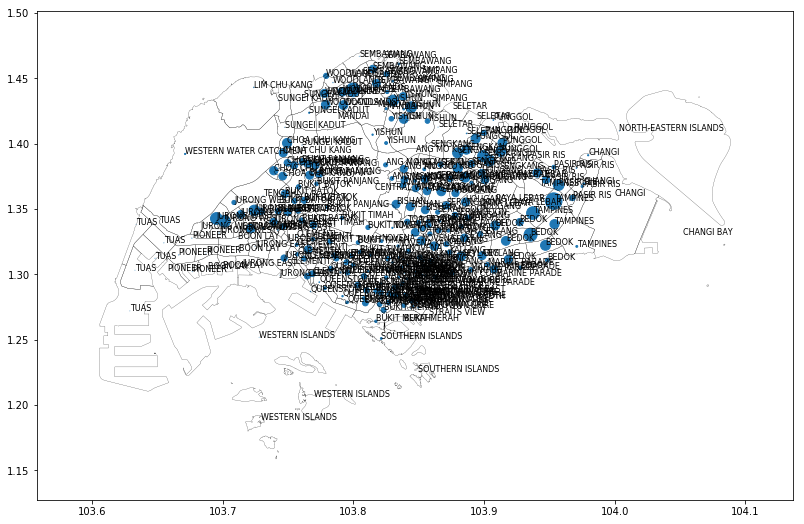

CPU times: user 5.96 s, sys: 479 ms, total: 6.43 s
Wall time: 6.49 s


In [16]:
%%time
fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(df["x_centre"], df["y_centre"], df["TOTAL"]/500)
lines = []

for i,(x,y,z) in enumerate(zip(df["x_centre"], df["y_centre"], df["PLN_AREA_N"])):
    plt.text(x,y,z,fontsize=8)

for rings in df["boundary"]:
    for b in rings:
        n = len(b)
        for e,_ in enumerate(b):
            lines.append([[b[e%n][0], b[e%n][1]], [b[(e+1)%n][0], b[(e+1)%n][1]]])
lc = mc.LineCollection(lines, colors="black", linewidths=0.2)
ax.add_collection(lc)
ax.autoscale()
ax.set_aspect(1)
ax.margins(0.1)
plt.show()

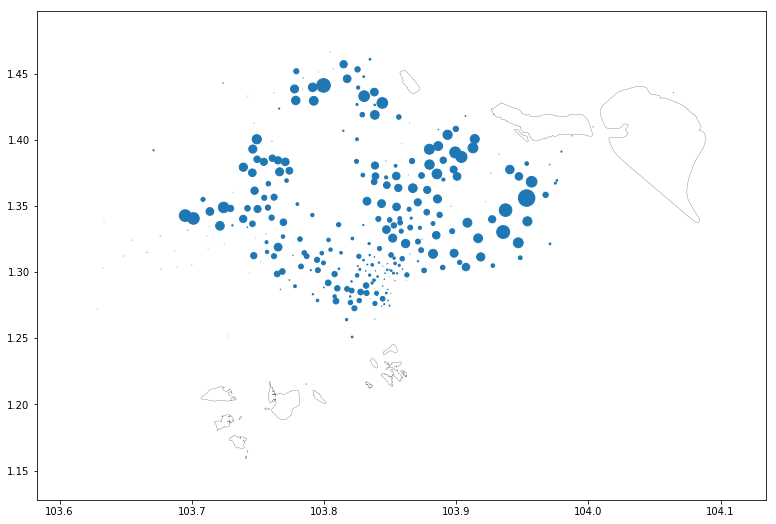

CPU times: user 306 ms, sys: 11 ms, total: 317 ms
Wall time: 319 ms


In [17]:
%%time
# probably should combine all these subzone into one
# lst = [24,27,28,29,31,32,69,73,83,84,104,105,106,110,118,135,140,164,322]
lst = [25,26,27,293,322]
fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(df["x_centre"], df["y_centre"], df["TOTAL"]/500)
lines = []
for i,rings in enumerate(df["boundary"]):
    if i not in lst:
        continue
    for b in rings:
        n = len(b)
        for e,_ in enumerate(b):
            lines.append([[b[e%n][0], b[e%n][1]], [b[(e+1)%n][0], b[(e+1)%n][1]]])
lc = mc.LineCollection(lines, colors="black", linewidths=0.2)
ax.add_collection(lc)
ax.autoscale()
ax.set_aspect(1)
ax.margins(0.1)
plt.show()

# Merge subzones
Some subzone do not share a boundary, we merge it with a subzone in the mainland

In [18]:
mergers = ((25,24), (26,24), (27,28), (293,268), (322,308))
def merge(child, mainland):
    df.at[mainland,"TOTAL"] += df.loc[child]["TOTAL"]
    df.at[mainland,"boundary"].extend(df.loc[child]["boundary"])
for merger in mergers:
    merge(merger[0], merger[1])
df = df.drop([x for x,_ in mergers])
df = df.reset_index()
print(df.shape)
df.sample(5)

(318, 8)


,index,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre
35,38,kml_39,11320,CHINATOWN,OUTRAM,"[[[103.843752427547, 1.28507938173851, 0.0], [...",103.844385,1.279932
13,13,kml_14,220,CECIL,DOWNTOWN CORE,"[[[103.849565771977, 1.2763428760502, 0.0], [1...",103.848575,1.278659
185,188,kml_189,0,BIDADARI,TOA PAYOH,"[[[103.878587076201, 1.34347362732641, 0.0], [...",103.874453,1.341961
2,2,kml_3,140,BOAT QUAY,SINGAPORE RIVER,"[[[103.850681360066, 1.28649059616468, 0.0], [...",103.848253,1.286980
176,179,kml_180,4960,SENNETT,TOA PAYOH,"[[[103.876837654191, 1.33759313661139, 0.0], [...",103.872554,1.333617


## Identify adjacent subzones

In [19]:
df["adjacent"] = [[] for x in df["id"]]

In [20]:
from collections import defaultdict

d_pts = defaultdict(set)

for index, row in df.iterrows():
    for ring in row["boundary"]:
        for pt in ring:
            d_pts[(pt[0],pt[1])].add(index)

In [21]:
for index, row in df.iterrows():
    adj_set = set()
    for ring in row["boundary"]:
        for pt in ring:
            adj_set |= d_pts[(pt[0],pt[1])]    
    df.at[index, "adjacent"] = list(adj_set - {index})

In [22]:
df.sample(5)

,index,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre,adjacent
26,29,kml_30,40,CITY TERMINALS,BUKIT MERAH,"[[[103.83234053531, 1.27243750137806, 0.0], [1...",103.838484,1.264624,"[8, 10, 14, 25, 27, 28, 29, 30]"
240,243,kml_244,14340,BOON TECK,TOA PAYOH,"[[[103.852950821436, 1.33140257787538, 0.0], [...",103.852842,1.335406,"[170, 172, 239, 182, 184]"
96,99,kml_100,12320,GEYLANG BAHRU,KALLANG,"[[[103.87564696645, 1.3202135864137, 0.0], [10...",103.871108,1.323183,"[111, 112, 177, 178, 176, 54, 121]"
92,95,kml_96,14320,MARGARET DRIVE,QUEENSTOWN,"[[[103.805105908234, 1.30035550503043, 0.0], [...",103.808029,1.298581,"[130, 67, 4, 5, 138, 45, 79, 51, 20]"
140,143,kml_144,41190,SIMEI,TAMPINES,"[[[103.952118035797, 1.33027698903009, 0.0], [...",103.953881,1.338505,"[99, 100, 165, 201, 139, 171]"


## Compute overlapping parameters

In [23]:
def compute_shared_parameter(b1,b2):
    
    d1 = set()
    d2 = set()
    
    for i,rings in enumerate([b1]):
        for b in b1:
            n = len(b)
            for e,_ in enumerate(b):
                uv = ((b[e%n][0], b[e%n][1]), (b[(e+1)%n][0], b[(e+1)%n][1]))
                d1.add((uv[0],uv[1]))
                d1.add((uv[1],uv[0]))
            
    for i,rings in enumerate([b2]):
        for b in rings:
            n = len(b)
            for e,_ in enumerate(b):
                uv = ((b[e%n][0], b[e%n][1]), (b[(e+1)%n][0], b[(e+1)%n][1]))
                d2.add((uv[0],uv[1]))
                d2.add((uv[1],uv[0]))
                
    d3 = d1.intersection(d2)
    shared = sum([((x1-x2)**2 + (y1-y2)**2)**0.5 
                  for ((x1,y1),(x2,y2)) in list(d3)])
    
    return shared/2

# example
b1 = [row for index, row in df.iterrows()][90]["boundary"]
b2 = [row for index, row in df.iterrows()][78]["boundary"]
compute_shared_parameter(b1,b2)

0.0

In [24]:
row

index                                                       321
id                                                      kml_322
TOTAL                                                        10
SUBZONE_N                             WOODLANDS REGIONAL CENTRE
PLN_AREA_N                                            WOODLANDS
boundary      [[[103.785998712995, 1.43436081042998, 0.0], [...
x_centre                                                103.784
y_centre                                                1.43834
adjacent                                                     []
Name: 317, dtype: object

In [25]:
shared_params_col = []
for index, row in df.iterrows():
    shared_params = []
    for adj_index in row["adjacent"]:
        shared_param = compute_shared_parameter(df.at[index, "boundary"],
                                                df.at[adj_index, "boundary"])
        if shared_param == 0: continue
        shared_params.append(shared_param)
    shared_params_col.append(shared_params)
df["shared_param"] = shared_params_col
df.sample(5)

,index,id,TOTAL,SUBZONE_N,PLN_AREA_N,boundary,x_centre,y_centre,adjacent,shared_param
2,2,kml_3,140,BOAT QUAY,SINGAPORE RIVER,"[[[103.850681360066, 1.28649059616468, 0.0], [...",103.848253,1.286980,"[129, 1, 36, 37, 38, 7]","[0.004642340228959931, 0.0030979561612115352, ..."
79,82,kml_83,6280,CHATSWORTH,TANGLIN,"[[[103.829002126163, 1.29898343574019, 0.0], [...",103.825107,1.297622,"[131, 67, 6, 136, 43, 20, 23, 89, 92]","[0.0036149519774984437, 0.01095272664159184, 0..."
138,141,kml_142,6400,LEEDON PARK,BUKIT TIMAH,"[[[103.794720154814, 1.32317710096521, 0.0], [...",103.798341,1.314412,"[67, 60, 174, 113, 114, 51, 57, 122, 92]","[0.0037941512657589027, 0.009554931068632798, ..."
196,199,kml_200,0,CHANGI BAY,CHANGI BAY,"[[[104.020757650388, 1.32566479607271, 0.0], [...",104.052358,1.330368,[285],[0.04632251918087505]
260,263,kml_264,30,GALI BATU,SUNGEI KADUT,"[[[103.774103650599, 1.39298929466509, 0.0], [...",103.760625,1.398961,"[288, 257, 258, 296, 299, 237, 271, 246, 310, ...","[0.01996634829120781, 0.0036166998106338974, 0..."


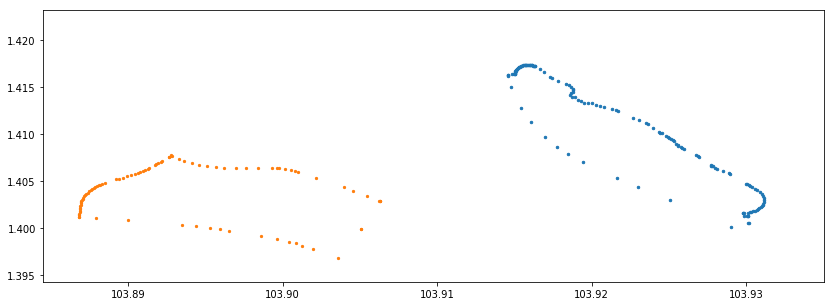

In [26]:
from collections import defaultdict
b1 = [row for index, row in df.iterrows()][300]["boundary"]
b2 = [row for index, row in df.iterrows()][273]["boundary"]
plt.figure(figsize=(14,5))
plt.scatter([x for x,_,_ in b1[0]],
            [y for _,y,_ in b1[0]], s=6)            
plt.scatter([x for x,_,_ in b2[0]],
            [y for _,y,_ in b2[0]], s=5)
plt.show()

## Plot graph

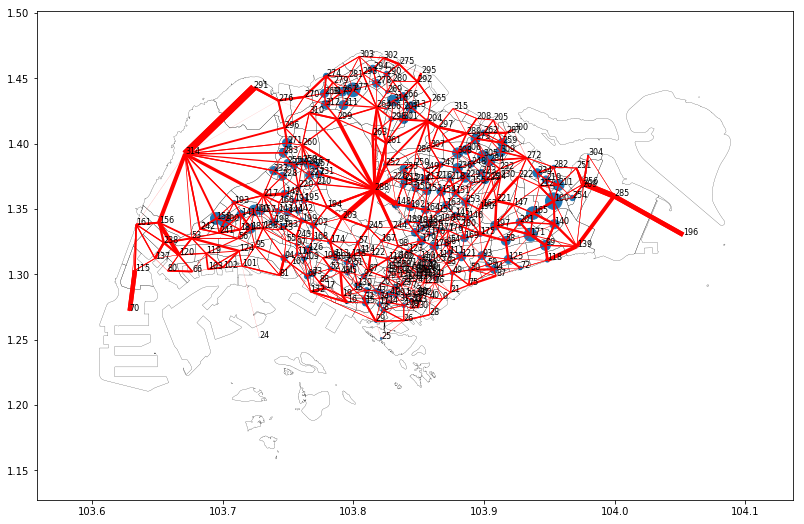

CPU times: user 12.9 s, sys: 423 ms, total: 13.3 s
Wall time: 13.4 s


In [27]:
%%time
fig, ax = plt.subplots(figsize=(14,9))

# plot population mass
plt.scatter(df["x_centre"], df["y_centre"], df["TOTAL"]/500)
for i,(x,y) in enumerate(zip(df["x_centre"], df["y_centre"])):
    plt.text(x,y,i,fontsize=8)
lines = []

# plot subzone boundaries
for i,rings in enumerate(df["boundary"]):
    for b in rings:
        n = len(b)
        for e,_ in enumerate(b):
            lines.append([[b[e%n][0], b[e%n][1]], [b[(e+1)%n][0], b[(e+1)%n][1]]])
lc = mc.LineCollection(lines, colors="black", linewidths=0.2)
ax.add_collection(lc)

# plot connecting subzones
lines_adj = []
linewidths = []
for i,(adjacent,shared_param) in enumerate(zip(df["adjacent"], df["shared_param"])):
    for adj,par in zip(adjacent,shared_param):
        lines_adj.append([[df["x_centre"][i], df["y_centre"][i]], 
                          [df["x_centre"][adj], df["y_centre"][adj]]])
        linewidths.append(par*100)
lc_adj = mc.LineCollection(lines_adj, colors="red", linewidths=linewidths)
ax.add_collection(lc_adj)

ax.autoscale()
ax.set_aspect(1)
ax.margins(0.1)
plt.show()

## Adjacency matrix

In [28]:
matrix = np.zeros((df.shape[0],df.shape[0]))
for i,(adjacent,shared_param) in enumerate(zip(df["adjacent"], df["shared_param"])):
    for adj,par in zip(adjacent,shared_param):
        matrix[i,adj] = np.log(par+0.00001) + np.log(1+df["TOTAL"][i]*df["TOTAL"][adj])

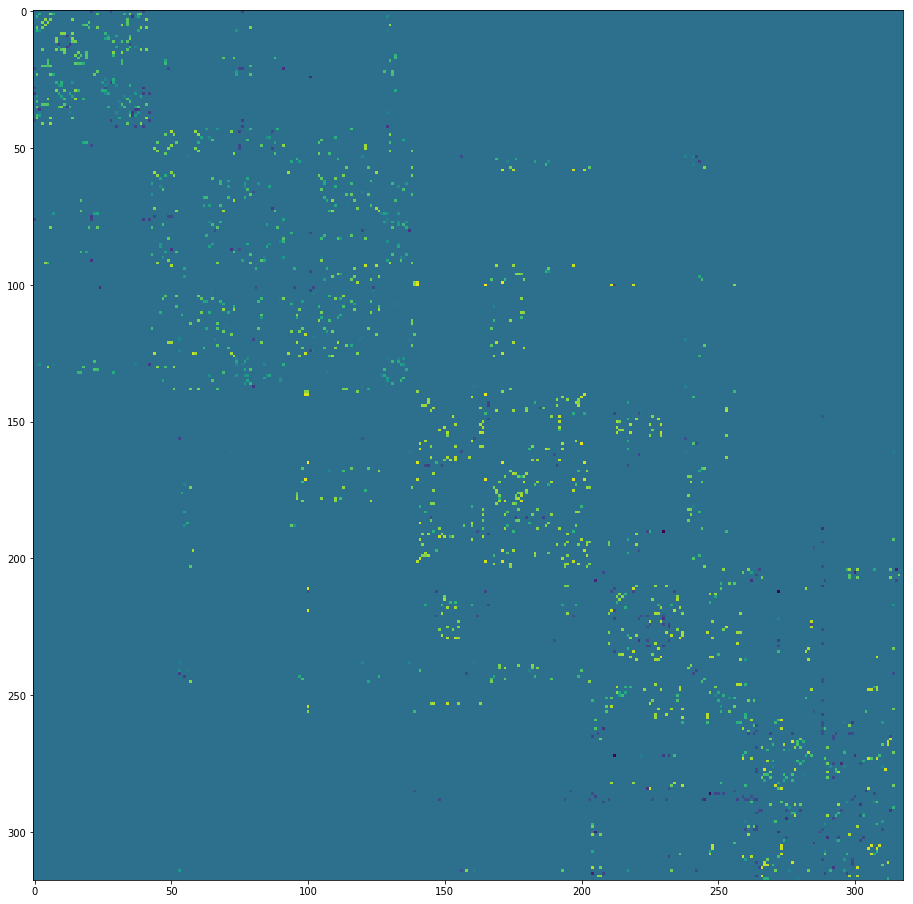

In [29]:
fig, ax = plt.subplots(figsize=(16,16))
ax = plt.imshow(matrix)
plt.show()

In [30]:
df.to_pickle("processed_dataframe.pkl")

In [31]:
# check if all subzone have shared boundaries
[i for i,ls in enumerate(df["shared_param"]) if ls == []]

[]